## Clean chapters
It is time to look at the chapters themselves. We already know that there are a lot of unnecessary newlines and spaces. So we start by removing them.

In [1]:
from src.utils import load_csv

In [9]:
from src.processing import lemmatize_text

In [24]:
test = "edel. ich bin eine edler maus! eine edlere maus gibt es nicht! welch goldene Glocke"

In [25]:
lemmatize_text(test)

'edel ich sein ein edl Maus ein edl Maus geben es nicht welcher golden Glocke'

In [2]:
load_csv('data/abc')

'No csv-file found'

In [2]:
import pandas as pd

In [3]:
ch = pd.read_csv('data/df_filtered.csv')

In [16]:
from matplotlib import pyplot as plt

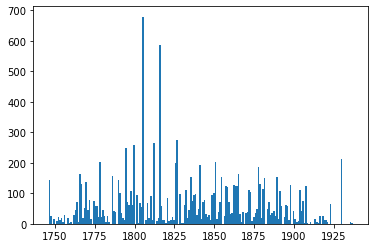

In [17]:
plt.hist(ch.year, bins=198)
plt.show()

# Simple base model
Today we'll get an MVP in a very simple fashion:

#### Tokenizing
- tokenize each chapter using the word_tokenize method from nltk
- keep tokens that have only letters with the string method .isalpha()
- keep chapters with enough tokens, say 50
- take the first 500 tokens for testing

#### Base model


In [5]:
import spacy
nlp = spacy.load('de_core_news_lg')

In [1]:
from src.utils import lemmatize_text, normalize_text

In [4]:
import nltk
#nltk.download('punkt')

In [66]:
for ent in doc.ents:
    if ent.label_ == 'PER':
        print(ent.text, ent.label_)

Wallpurgis PER
Godwi PER
Franzesko Fiormonti PER
Antonio PER
Jambe PER
Locke PER
Beruhet PER
Godwi PER
Ruhet PER
Wallpurgis PER
Godwi PER
Harfenspieler PER
Jüngling PER
bewegn PER
Jungfrau Gott PER
Vorüberging PER
respektabl PER
Helios PER
Stralet PER
Haines PER
Amaro Bitter PER
Zerrinn PER
Jungfrau PER
Weichet PER
Erblühn PER
Rose Rot dich PER
mein Lippe Strahlet PER
Düft PER
lind Sonnenstrale PER
dunkl PER
Erzeuget PER
Thran PER
Beweget von Weste PER
Locke Goldne PER
Ander PER
Löset PER
Düft PER
Glühet PER
Hüt PER
Locke PER
Italiäner PER
gehn Godwi PER
Georg der Diener PER


In [69]:
stopwords = ['der', 'dass', 'und', 'zu', 'von', 'auf', 'um',
             'ich', 'du', 'er', 'sie', 'es', 'wir', 'ihr',
             'sich', 'sein', 'mein', 'dein', 'dich', 'mich',
             'als', 'in', 'ein', 'an']

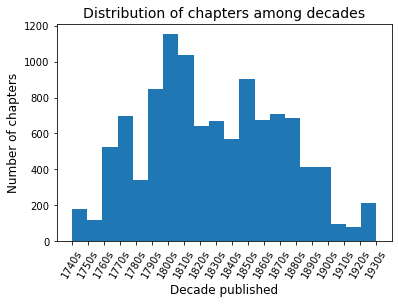

In [176]:
plt.hist(ch.decade.sort_values(), bins= 20)
plt.xticks(rotation = 60)
plt.xticks(['1740s', '1750s', '1760s', '1770s', '1780s', '1790s',
            '1800s', '1810s', '1820s', '1830s', '1840s', 
            '1850s', '1860s', '1870s', '1880s', '1890s', 
            '1900s', '1910s', '1920s', '1930s']) 
plt.xlabel('Decade published', fontsize=12)
plt.ylabel('Number of chapters', fontsize=12)
plt.title('Distribution of chapters among decades', fontsize=14)
plt.savefig('viz/chapter_decades_hist.png')
plt.show()

we see some issue here: a major part of the chapters was written in the 19th century. We don't care about that for now, but keep it in mind for later. Two solution could be:
- focus on the rich middle part: about 1760s - 1890s with a limit of about 500 chapters per decade
- collect data explicitly from decades that are misrepresented


In [38]:
X = ch['test_strings']
y = ch['decade']

In [39]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.85, random_state=42)

In [41]:
count_vector = CountVectorizer()
X_train_counts = count_vector.fit_transform(X_train)

In [42]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [43]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [44]:
X_test_counts = count_vector.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [45]:
y_pred = clf.predict(X_test_tfidf)

In [46]:
from sklearn.metrics import accuracy_score

In [47]:
accuracy_score(y_test, y_pred)

0.3513677811550152

In [136]:
import seaborn as sns

In [49]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [50]:
heat_data = confusion_matrix(y_test, y_pred)

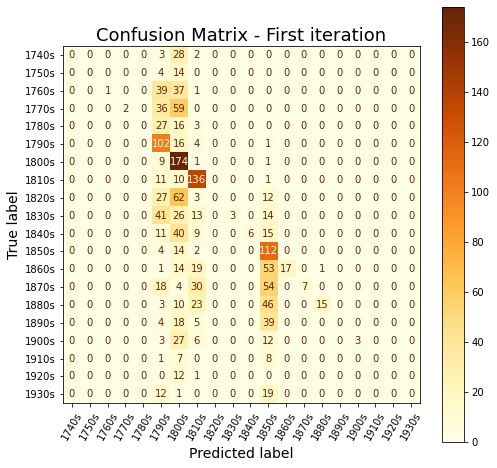

In [152]:
fig, ax = plt.subplots(figsize=(8,8))

disp = ConfusionMatrixDisplay(
    heat_data,
    display_labels = ['1740s', '1750s', '1760s', '1770s', '1780s', '1790s',
            '1800s', '1810s', '1820s', '1830s', '1840s', 
            '1850s', '1860s', '1870s', '1880s', '1890s', 
            '1900s', '1910s', '1920s', '1930s'])
disp.plot(ax=ax, xticks_rotation=60, cmap='YlOrBr')
plt.title('Confusion Matrix - First iteration', fontsize=18, pad=5)
plt.xlabel('Predicted label', fontsize=14, labelpad = 5)
plt.ylabel('True label', fontsize=14)
plt.savefig('viz/heatmap_iteration_1.png')
plt.show()

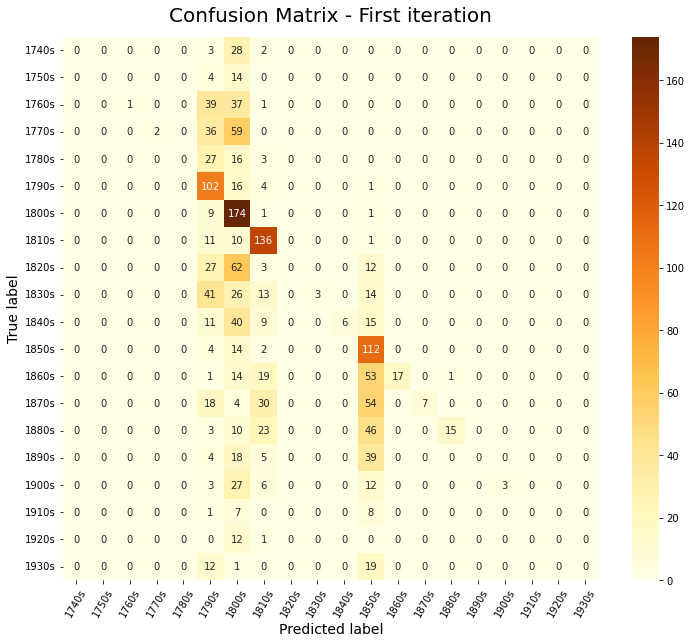

In [164]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data = heat_data, 
            cmap = 'YlOrBr',
            annot=True,
            fmt = 'd',
            xticklabels = ['1740s', '1750s', '1760s', '1770s', '1780s',
                           '1790s', '1800s', '1810s', '1820s', '1830s',
                           '1840s', '1850s', '1860s', '1870s', '1880s', 
                           '1890s', '1900s', '1910s', '1920s', '1930s'],
           yticklabels = ['1740s', '1750s', '1760s', '1770s', '1780s',
                           '1790s', '1800s', '1810s', '1820s', '1830s',
                           '1840s', '1850s', '1860s', '1870s', '1880s', 
                           '1890s', '1900s', '1910s', '1920s', '1930s']
           )


#disp.plot(ax=ax, xticks_rotation=60, cmap='YlOrBr')
plt.title('Confusion Matrix - First iteration', fontsize=20, pad=15.0)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xticks(rotation=60)
plt.savefig('viz/sns_heatmap_iteration_1.png')
plt.show()

In [53]:
ch.author.nunique()

41

from the value_counts of the test_data and from the heatmap it can be seen that our model likes to predict the decades that it has been fed the most.
But nonetheless: 35% accuracy.

better than random, so it could be worse :) I wished the predictions would have been closer to the principal diagonal of the heatmap though.

Interesting observation to note: The predicted labels for 2, 3, 9, 10, 12, 13, 16 (and almost 14) have all been correct! 

The corresponding decades are: 1760, 1770, 1830, 1840, 1860, 1870, 1900.

So the machine only used these labels if it was (almost) certain the label was correct! 
Maybe some works from these decade use quite unique words, that are not seen in other decades. These could very well be Character Names or places that were mentioned. If these special words are missing it takes the "safe" decades which the machine was trained with the most.

## Ideas for improvement:
- As mentioned before we saw that our data is skewed. We can collect more data or limit the amount of chapter from each decade.
- Get more authors in exchange for a maximum number of titles from each author for a more diverse training. Right now we only have 41 authors.
- Don't limit the number of tokens for training the model. Maybe because of the limited amount of words the AI could not get the 'essence' of the chapter for classification
- Try other classification models
- remove stop-words in preprocessing
- Remove Character names and names of places from the tokens.
- Try not to predict the decade but the era/period (e.g. baroque, classicism, romanticism). If some author has the most publications e.g. in the years 1809 - 1811, then the categorization into different decades seems arbitrary for the machine. Style differences among different eras (and therefore maybe also among authors) might be easier to grasp for classification models.

## Iteration using all the tokens


In [54]:
ch['strings'] = ch['tokens'].apply(lambda x: ' '.join(x))

In [55]:
X = ch.strings
y = ch.decade

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.85, random_state=42)

In [57]:
count_vector = CountVectorizer()
X_train_counts = count_vector.fit_transform(X_train)

In [58]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [59]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [60]:
X_test_counts = count_vector.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [61]:
y_pred = clf.predict(X_test_tfidf)

In [62]:
from sklearn.metrics import accuracy_score

In [63]:
accuracy_score(y_test, y_pred)

0.3386018237082067

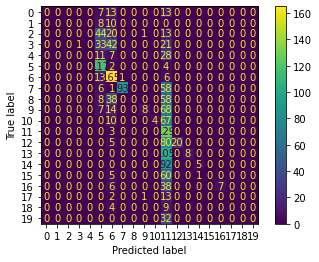

In [64]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
dist.plot()
plt.show()

-> not so great

But you can say that the same observations hold more or less true in this case

## Limit decades and train chapters

In [65]:
ch.decade.value_counts()

1800    1154
1810    1036
1850     905
1790     848
1870     710
1770     698
1880     686
1860     674
1830     670
1820     641
1840     569
1760     524
1890     414
1900     411
1780     339
1930     214
1740     181
1750     116
1910      94
1920      79
Name: decade, dtype: int64

In [66]:
ch_1790 = ch.loc[ch.decade == '1790'].sample(500)
ch_1800 = ch.loc[ch.decade == '1800'].sample(500)
ch_1810 = ch.loc[ch.decade == '1810'].sample(500)
ch_1820 = ch.loc[ch.decade == '1820'].sample(500)
ch_1830 = ch.loc[ch.decade == '1830'].sample(500)
ch_1840 = ch.loc[ch.decade == '1840'].sample(500)
ch_1850 = ch.loc[ch.decade == '1850'].sample(500)
ch_1860 = ch.loc[ch.decade == '1860'].sample(500)
ch_1870 = ch.loc[ch.decade == '1870'].sample(500)
ch_1880 = ch.loc[ch.decade == '1880'].sample(500)

In [67]:
df_list = [ch_1790, 
           ch_1800, 
           ch_1810, 
           ch_1820, 
           ch_1830, 
           ch_1840, 
           ch_1850, 
           ch_1860, 
           ch_1870, 
           ch_1880]

In [68]:
X = []
y = []
for df in df_list:
    X.extend(list(df.strings))
    y.extend(list(df.decade))

In [69]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size = 0.85, random_state=42)

In [70]:
count_vector = CountVectorizer()
X_train_counts = count_vector.fit_transform(X_train)

In [71]:
tfidf_transformer = TfidfTransformer()
X_train_tfidf = tfidf_transformer.fit_transform(X_train_counts)

In [72]:
clf = MultinomialNB()
clf.fit(X_train_tfidf, y_train)

MultinomialNB()

In [73]:
X_test_counts = count_vector.transform(X_test)
X_test_tfidf = tfidf_transformer.transform(X_test_counts)

In [74]:
y_pred = clf.predict(X_test_tfidf)

In [75]:
from sklearn.metrics import accuracy_score

In [76]:
accuracy_score(y_test, y_pred)

0.5346666666666666

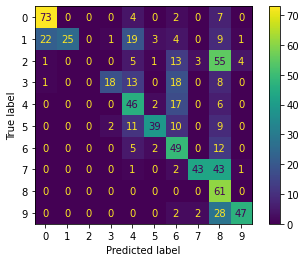

In [77]:
dist = ConfusionMatrixDisplay(confusion_matrix(y_test, y_pred))
dist.plot()
plt.show()

## Model next iteration
We got some more chapters and we also lemmatized them.
what we do now is to run the simple base model again with the lemmatized chapters. We'll probably run it with stopwords to reduce runtime.

In [2]:
import pandas as pd
df = pd.read_csv('data/df_lemmatized.csv')
df= df.drop(columns= ['tokens'])
from ast import literal_eval
df['lemma'] = df['lemma'].apply(lambda x: literal_eval(x))

In [5]:
len(df.chapter[1])

12142

In [6]:
df['num_lemma'] = df.lemma.apply(lambda x: len(x))

In [8]:
df = df.drop(columns= ['ch_len'])

In [10]:
df.num_lemma.describe()

count    20309.000000
mean      2009.890295
std       2758.372005
min          0.000000
25%        475.000000
50%       1576.000000
75%       2438.000000
max      93056.000000
Name: num_lemma, dtype: float64

In [13]:
df = df.loc[~df.num_lemma < 50]

In [14]:
df['ch_lemma'] = df.lemma.apply(lambda x: ' '.join(x))

In [22]:
decade_list = df.decade.value_counts().head(18).index.tolist()

In [43]:
df.decade.value_counts()

1800s    2568
1790s    1686
1900s    1367
1850s    1344
1770s    1300
1820s    1291
1830s    1136
1870s    1082
1890s    1061
1840s    1047
1880s    1035
1910s    1018
1860s     875
1930s     766
1920s     631
1810s     621
1780s     545
1760s     531
Name: decade, dtype: int64

In [23]:
df = df.loc[~((df.decade == '1730s') 
            | (df.decade == '1740s') 
            | (df.decade == '1750s') 
            | (df.decade == '1940s'))]

In [24]:
X = []
y = []
for dec in decade_list: 
    sample = df.loc[df.decade == dec].sample(500)
    X.extend(list(sample['ch_lemma']))
    y.extend(list(sample['decade']))

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB

In [33]:
accuracy_score(y_test, y_pred)

0.4311111111111111

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [47]:
decade_list.sort()

['1760s',
 '1770s',
 '1780s',
 '1790s',
 '1800s',
 '1810s',
 '1820s',
 '1830s',
 '1840s',
 '1850s',
 '1860s',
 '1870s',
 '1880s',
 '1890s',
 '1900s',
 '1910s',
 '1920s',
 '1930s']

In [41]:
from matplotlib import pyplot as plt
import seaborn as sns

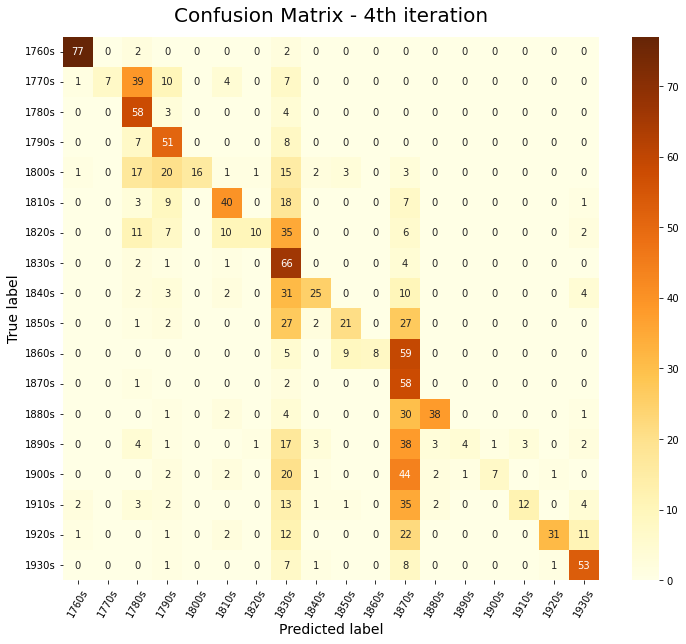

In [48]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data = confusion_matrix(y_test, y_pred), 
            cmap = 'YlOrBr',
            annot=True,
            fmt = 'd',
            xticklabels = decade_list,
           yticklabels = decade_list
           )


#disp.plot(ax=ax, xticks_rotation=60, cmap='YlOrBr')
plt.title('Confusion Matrix - 4th iteration', fontsize=20, pad=15.0)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xticks(rotation=60)
#plt.savefig('viz/sns_heatmap_iteration_3.png')
plt.show()

In [59]:
authors_list = df.author.value_counts().index.tolist()

In [60]:
for author in authors_list:
    if df.loc[df.author == author].shape[0] > 500:
        df.loc[df.author == author] = df.loc[df.author == author].sample(500)

In [71]:
df = df.loc[~df.ch_lemma.isna()]

In [88]:
decade_list = df.decade.value_counts().index.tolist()
for decade in decade_list:
    if df.loc[df.decade == decade].shape[0] > 500:
        df.loc[df.decade == decade] = df.loc[df.decade == decade].sample(500)
df = df.loc[~df.decade.isna()]

C:\Users\muell\anaconda3\lib\site-packages\pandas\core\indexing.py:1884: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, val, pi)


In [89]:
X = df.ch_lemma
y = df.decade

In [96]:
from sklearn.metrics import accuracy_score

In [98]:
decades = df.decade.value_counts().index.tolist()
decades.sort()

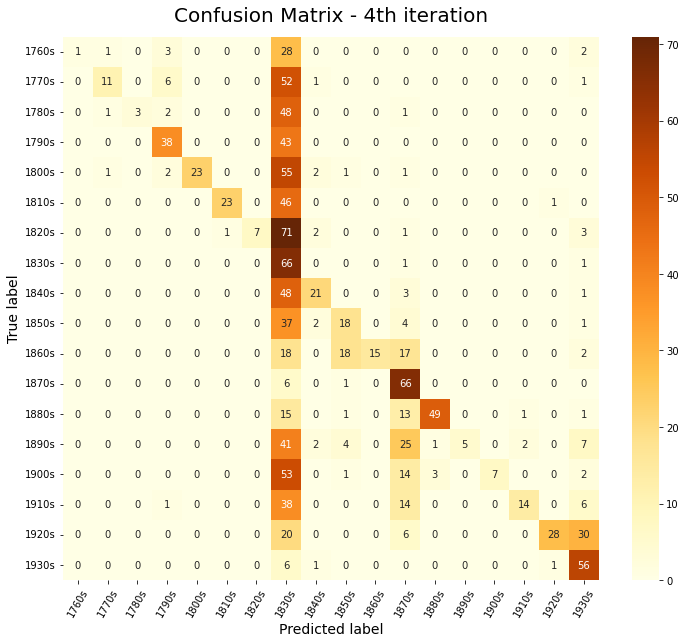

In [99]:
fig, ax = plt.subplots(figsize = (12,10))
sns.heatmap(data = confusion_matrix(y_test, y_pred), 
            cmap = 'YlOrBr',
            annot=True,
            fmt = 'd',
            xticklabels = decades,
           yticklabels = decades
           )


#disp.plot(ax=ax, xticks_rotation=60, cmap='YlOrBr')
plt.title('Confusion Matrix - 4th iteration', fontsize=20, pad=15.0)
plt.xlabel('Predicted label', fontsize=14)
plt.ylabel('True label', fontsize=14)
plt.xticks(rotation=60)
#plt.savefig('viz/sns_heatmap_iteration_3.png')
plt.show()

In [103]:
from src.utils import predict_decades

In [104]:
y_test, y_pred = predict_decades(X,y)

In [106]:
accuracy_score(y_test, y_pred)

0.3479938271604938